<a href="https://colab.research.google.com/github/akrags1602/Heart_Disease_Predictor/blob/main/Heart_Disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autoviz
!pip install -U feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 456.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: boke

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 84.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from feature_engine.encoding import RareLabelEncoder # For encoding rare labels; we could have also used sklearn encoder with infrequent categories
from feature_engine.outliers import Winsorizer
%matplotlib inline

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv', header=0)
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
cat_cols=['sex','chest pain type','fasting blood sugar','resting ecg','exercise angina','ST slope','target']
num_cols= ['age','cholesterol','resting bp s','max heart rate', 'oldpeak']

In [5]:
df[cat_cols]= df[cat_cols].astype('category')

In [6]:
print(df.isnull().sum())
print(df.shape)
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
(1190, 12)
272


# **Outcome's correlation with Categorical Variables**

<Figure size 800x1500 with 0 Axes>

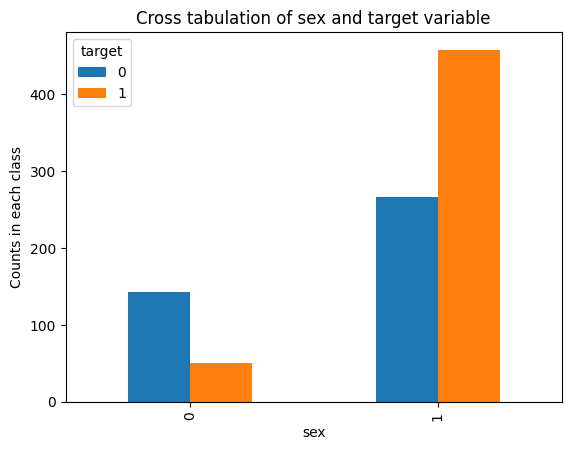

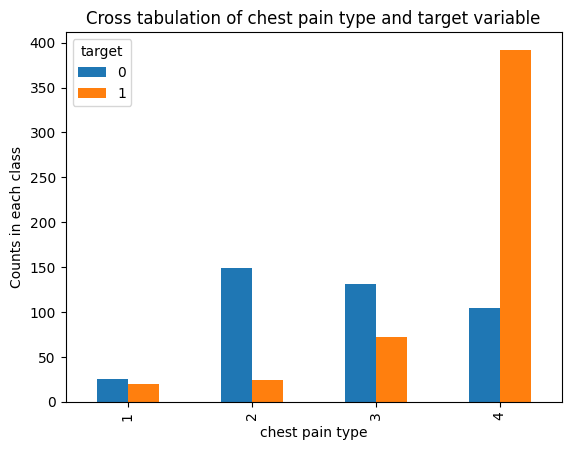

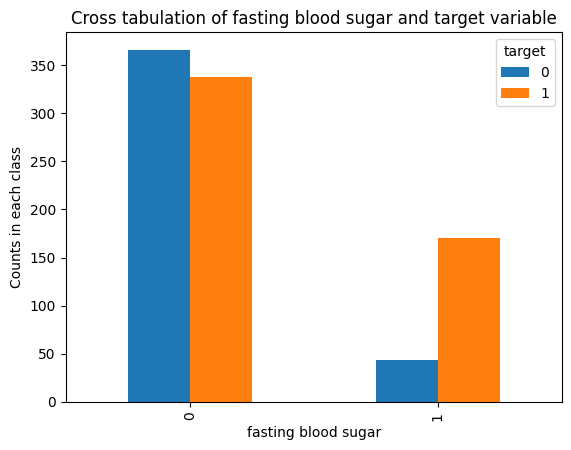

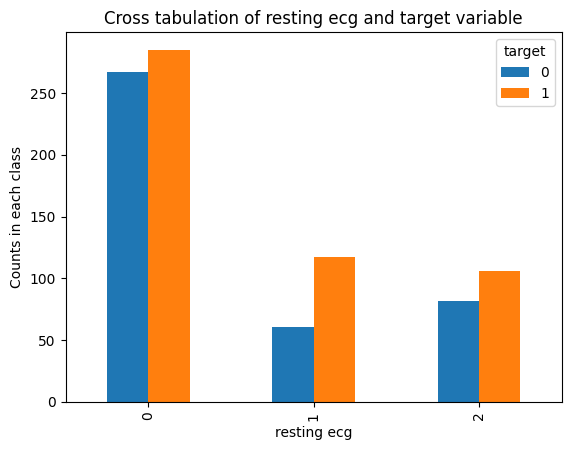

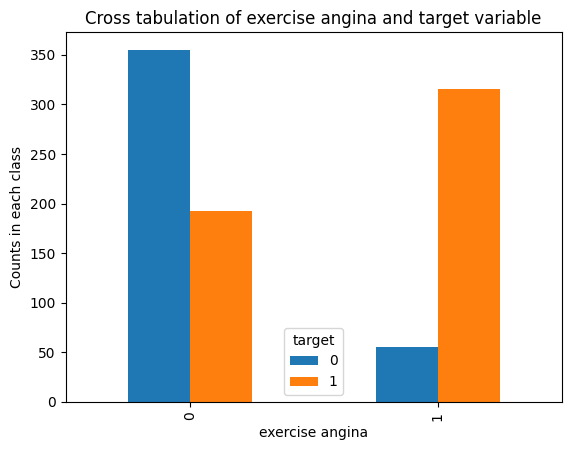

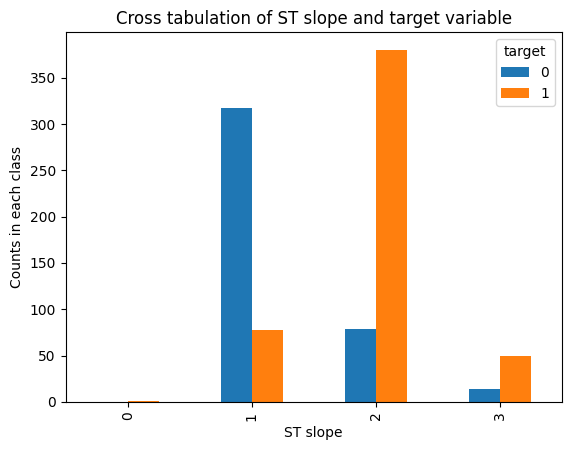

In [8]:
plt.figure(figsize=(8,15))
cat_col=['sex','chest pain type','fasting blood sugar','resting ecg','exercise angina','ST slope']
for col in cat_col:
  crosstab= pd.crosstab(df[col],df['target'])
  crosstab.plot(kind='bar')
  plt.xlabel(col)
  plt.ylabel('Counts in each class')
  plt.title(f'Cross tabulation of {col} and target variable')
  plt.show()

Some insights:
1. The number of men who suffer from heart disease is more than the number of women. But demographically speaking, the number of men are more. So that can create a sort of bias
2. Chest Pain Type 4 has the highest number of observations that develop heart disease and type 1 observations have lowest number of heart disease patients
3. Those people having fasting blood sugar <= 120mg/dl have a higher count
of suffering from heart disease. But there is a possibility of collecting
more samples of people who dont have fasting blood sugar for the study which may lead to bias.
4. Observations with 0 resting ECG suffer have a higher count of heart disease patients
5. Individuals with ST Slope 1 and 2 have the highest count of heart disease patients

# **Outcome's correlation with Numeric variables**

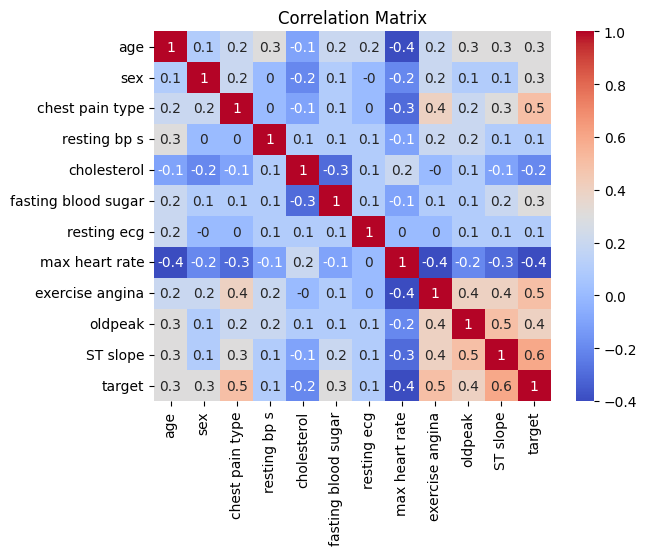

In [10]:
corr_matrix = df.corr().round(1)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Nominal categorical variables from the dataset
nom_cat_vars = ['sex','chest pain type','fasting blood sugar','resting ecg','exercise angina','target']

# Categorical variables with rare categories
rare_cat_vars = ['ST slope']
# Numeric variables that ahave skew in them
num_vars = ['resting bp s','cholesterol','max heart rate','oldpeak','age']


In [12]:
# Pipeline for Skewed numeric variables
skewed_num_pipe  = Pipeline(steps = [("out", Winsorizer(capping_method='quantiles', tail='both', fold=.06))])
# Nominal Categorical Variables
nom_cat_pipe = Pipeline(steps = [("ohe", OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore', categories='auto'))])
# Rare Categorical Variables
rare_cat_pipe = Pipeline(steps = [("rare", RareLabelEncoder(tol=0.05, n_categories=4)), ("ohe", OneHotEncoder(sparse_output=False))])

preprocessor = ColumnTransformer(transformers = [("nom", nom_cat_pipe, nom_cat_vars),
                                                 ("rare", rare_cat_pipe, rare_cat_vars),
                                                 ("skew", skewed_num_pipe, num_vars)], remainder = "passthrough")
preprocessor.set_output(transform = "pandas")
preprocessor.fit(df)
df2 = preprocessor.transform(df)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable ST slope is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


In [13]:
df2.columns

Index(['nom__sex_1', 'nom__chest pain type_2', 'nom__chest pain type_3',
       'nom__chest pain type_4', 'nom__fasting blood sugar_1',
       'nom__resting ecg_1', 'nom__resting ecg_2', 'nom__exercise angina_1',
       'nom__target_1', 'rare__ST slope_0', 'rare__ST slope_1',
       'rare__ST slope_2', 'rare__ST slope_3', 'skew__resting bp s',
       'skew__cholesterol', 'skew__max heart rate', 'skew__oldpeak',
       'skew__age'],
      dtype='object')

In [14]:
df2.head()

,nom__sex_1,nom__chest pain type_2,nom__chest pain type_3,nom__chest pain type_4,nom__fasting blood sugar_1,nom__resting ecg_1,nom__resting ecg_2,nom__exercise angina_1,nom__target_1,rare__ST slope_0,rare__ST slope_1,rare__ST slope_2,rare__ST slope_3,skew__resting bp s,skew__cholesterol,skew__max heart rate,skew__oldpeak,skew__age
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,140,289.0,172,0.0,40
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,160,180.0,156,1.0,49
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130,283.0,98,0.0,38
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,138,214.0,108,1.5,48
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,150,195.0,122,0.0,54


While designing the model, we need to understand the purpose of building this model and what metric is required to be evaluated to assess the model performance.

The cost of misclassifying a person having heart disease symptoms as someone who will not develop a heart attack is much more than the cost of misclassifying someone who is not prone to heart disease as someone who doesn't.
Since the weightage of False Negatives is more, I shall be considering Recall to evaluate each model

# **Random forest grid search model**

In [22]:
X = df2.drop(columns=['nom__target_1'])  # Assuming 'nom__target_1' is the target variable
y = df2['nom__target_1']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Define models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=2000,random_state=42)

The grid search technique is to find the ideal set of hyperparameters that can maximize accuracy metrics

In [16]:
# Define parameter grids for grid search
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [2,3,5,7,9, 10, 15],
    'min_samples_split': [2,3,5,7,11]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.02,0.05,0.07,0.09, 0.11],
    'max_depth': [5, 10, 15, 20]
}

lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 3, 5, 7, 10],
    'solver': ['liblinear','saga']
}

In [24]:
# Perform Grid Search
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
rf_best_model = rf_grid_search.best_estimator_
rf_pred = rf_best_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88        77
         1.0       0.92      0.90      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.89       184
weighted avg       0.90      0.90      0.90       184



The overall accuracy is 89% and the recall for class 1 is 90% which means that 90% of the actual observations who have a heart disease are predicted correctly. The remaining 10% are falsely predicted as observations who dont have a heart disease

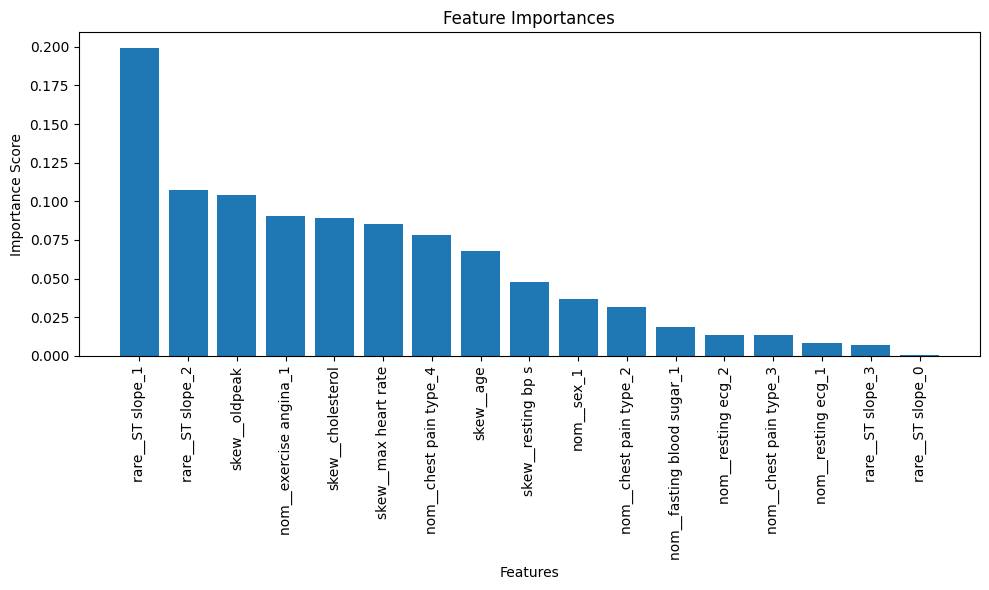

In [25]:
importances = rf_best_model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# **Gradient Boosting**

In [26]:
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)
print("Gradient Boosting Best Parameters:", gb_grid_search.best_params_)
gb_best_model = gb_grid_search.best_estimator_
gb_pred = gb_best_model.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))

Gradient Boosting Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84        77
         1.0       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



The overall accuracy is 85% and the recall for class 1 is 84% which means that 84% of the actual observations who have a heart disease are predicted correctly. The remaining 16% are falsely predicted as observations who dont have a heart disease

# **Logistic Regression**

In [32]:
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)
print("Logistic Regression Best Parameters:", lr_grid_search.best_params_)
lr_best_model = lr_grid_search.best_estimator_
lr_pred = lr_best_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

Logistic Regression Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84        77
         1.0       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



The overall accuracy is 86% and the recall for class 1 is 88% which means that 88% of the actual observations who have a heart disease are predicted correctly. The remaining 12% are falsely predicted as observations who dont have a heart disease

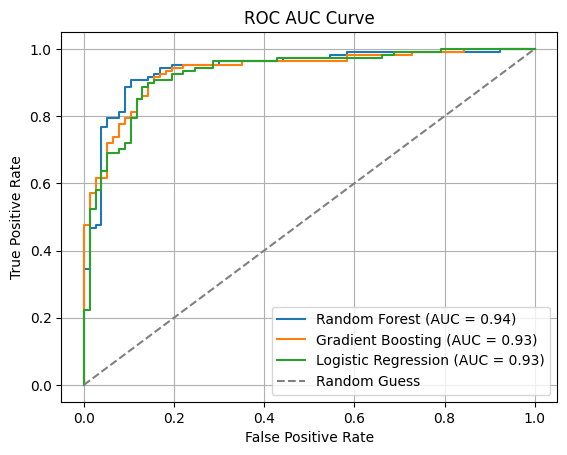

In [30]:
rf_probs = rf_best_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')

# Gradient Boosting
gb_probs = gb_best_model.predict_proba(X_test)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
gb_auc = auc(gb_fpr, gb_tpr)
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')

# Logistic Regression
lr_probs = lr_best_model.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')

# Plotting settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.grid(True)
plt.show()

When we plot the AUC-ROC curve, a higher AUC means better model. Therefore, when I take both recall and AUC-ROC into consideration, I believe that random forest is the ideal model to implement in designing an algorithm that predicts heart attack risk.
